In [1]:
# Packages importieren
import joblib
from joblib import load, dump

import shap
from shap import Explanation
import lime
from lime.lime_tabular import LimeTabularExplainer

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.inspection import permutation_importance

In [2]:
# Datenabrufen
X_train = pd.read_csv("../Resampling/X_train.csv", index_col=0)
X_test = pd.read_csv("../Resampling/X_test.csv", index_col=0)
X_val = pd.read_csv("../Resampling/X_val.csv", index_col=0)

X_train_stm = pd.read_csv("../Resampling/X_train_stm.csv", index_col=0)
X_test_stm = pd.read_csv("../Resampling/X_test_stm.csv", index_col=0)
X_val_stm = pd.read_csv("../Resampling/X_val_stm.csv", index_col=0)

y_train = pd.read_csv("../Resampling/y_train.csv", index_col=0)
y_train_stm = pd.read_csv("../Resampling/y_train_stm.csv", index_col=0)

y_test = pd.read_csv("../Resampling/y_test.csv", index_col=0)
y_val = pd.read_csv("../Resampling/y_val.csv", index_col=0)

print("Alle Datensätze wurden importiert.")

Alle Datensätze wurden importiert.


In [3]:
# Path vorbereiten und Model importieren
modell = joblib.load('../Modelle/Random_Forest/rf.pkl')

In [4]:
# Perturbieren Nr. 27174 positive Änderung
obs_original_1 = X_test.iloc[2]
obs_1p = obs_original_1.copy()

obs_1p.iloc[0:3] = obs_1p.iloc[0:3] * 0.95
obs_1p['GenHlth'] = obs_1p['GenHlth'] - 1
obs_1p['Age'] = obs_1p['Age'] - 1
obs_1p['Education'] = obs_1p['Education'] + 1
obs_1p['Income'] = obs_1p['Income'] + 0 # Schon höchsten

print(obs_1p)

BMI                    -0.230328
MentHlth               -0.427943
PhysHlth               -0.486977
HighBP                  0.000000
HighChol                0.000000
CholCheck               1.000000
Smoker                  0.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            1.000000
Fruits                  1.000000
Veggies                 1.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           1.000000
NoDocbcCost             0.000000
GenHlth                 1.000000
DiffWalk                0.000000
Sex                     0.000000
Age                     4.000000
Education               6.000000
Income                  8.000000
Name: 27174, dtype: float64


In [5]:
# Perturbieren Nr. 27174 negative Änderung
obs_original_1 = X_test.iloc[2]
obs_1n = obs_original_1.copy()

obs_1n.iloc[0:3] = obs_1n.iloc[0:3] * 1.05
obs_1n['GenHlth'] = obs_1n['GenHlth'] + 1
obs_1n['Age'] = obs_1n['Age'] + 1
obs_1n['Education'] = obs_1n['Education'] - 1
obs_1n['Income'] = obs_1n['Income'] - 1

print(obs_1n)

BMI                    -0.254573
MentHlth               -0.472989
PhysHlth               -0.538237
HighBP                  0.000000
HighChol                0.000000
CholCheck               1.000000
Smoker                  0.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            1.000000
Fruits                  1.000000
Veggies                 1.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           1.000000
NoDocbcCost             0.000000
GenHlth                 3.000000
DiffWalk                0.000000
Sex                     0.000000
Age                     6.000000
Education               4.000000
Income                  7.000000
Name: 27174, dtype: float64


In [6]:
# Perturbieren Nr. 225051 positive Änderung
obs_original_2 = X_test.iloc[1]
obs_2p = obs_original_2.copy()

obs_2p.iloc[0:3] = obs_2p.iloc[0:3] * 0.95
obs_2p['GenHlth'] = obs_2p['GenHlth'] - 1
obs_2p['Age'] = obs_2p['Age'] - 1
obs_2p['Education'] = obs_2p['Education'] + 1
obs_2p['Income'] = obs_2p['Income'] + 1

print(obs_2p)

BMI                     1.038370
MentHlth               -0.427943
PhysHlth               -0.486977
HighBP                  1.000000
HighChol                0.000000
CholCheck               1.000000
Smoker                  1.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            0.000000
Fruits                  0.000000
Veggies                 1.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           1.000000
NoDocbcCost             1.000000
GenHlth                 2.000000
DiffWalk                1.000000
Sex                     0.000000
Age                     9.000000
Education               4.000000
Income                  5.000000
Name: 225051, dtype: float64


In [7]:
# Perturbieren Nr. 27174 negative Änderung
obs_original_2 = X_test.iloc[1]
obs_2n = obs_original_2.copy()

obs_2n.iloc[0:3] = obs_2n.iloc[0:3] * 1.05
obs_2n['GenHlth'] = obs_2n['GenHlth'] + 1
obs_2n['Age'] = obs_2n['Age'] + 1
obs_2n['Education'] = obs_2n['Education'] - 1
obs_2n['Income'] = obs_2n['Income'] - 1

print(obs_2n)

BMI                      1.147672
MentHlth                -0.472989
PhysHlth                -0.538237
HighBP                   1.000000
HighChol                 0.000000
CholCheck                1.000000
Smoker                   1.000000
Stroke                   0.000000
HeartDiseaseorAttack     0.000000
PhysActivity             0.000000
Fruits                   0.000000
Veggies                  1.000000
HvyAlcoholConsump        0.000000
AnyHealthcare            1.000000
NoDocbcCost              1.000000
GenHlth                  4.000000
DiffWalk                 1.000000
Sex                      0.000000
Age                     11.000000
Education                2.000000
Income                   3.000000
Name: 225051, dtype: float64


## E_T_RF_1: Analyse der intrinsischen Erklärbarkeit von Random Forest

In [8]:
# Features Importance
importances = modell.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)
print("Feature Importances:")
for feature, importance in feat_imp.items():
    print(f"{feature}: {importance:.4f}")

Feature Importances:
GenHlth: 0.1987
HighBP: 0.1765
BMI: 0.1473
Age: 0.1191
HighChol: 0.0886
DiffWalk: 0.0489
Income: 0.0367
PhysHlth: 0.0359
HeartDiseaseorAttack: 0.0260
MentHlth: 0.0234
Education: 0.0178
Sex: 0.0139
CholCheck: 0.0122
HvyAlcoholConsump: 0.0119
PhysActivity: 0.0096
Smoker: 0.0084
Fruits: 0.0081
Veggies: 0.0060
Stroke: 0.0046
NoDocbcCost: 0.0037
AnyHealthcare: 0.0025


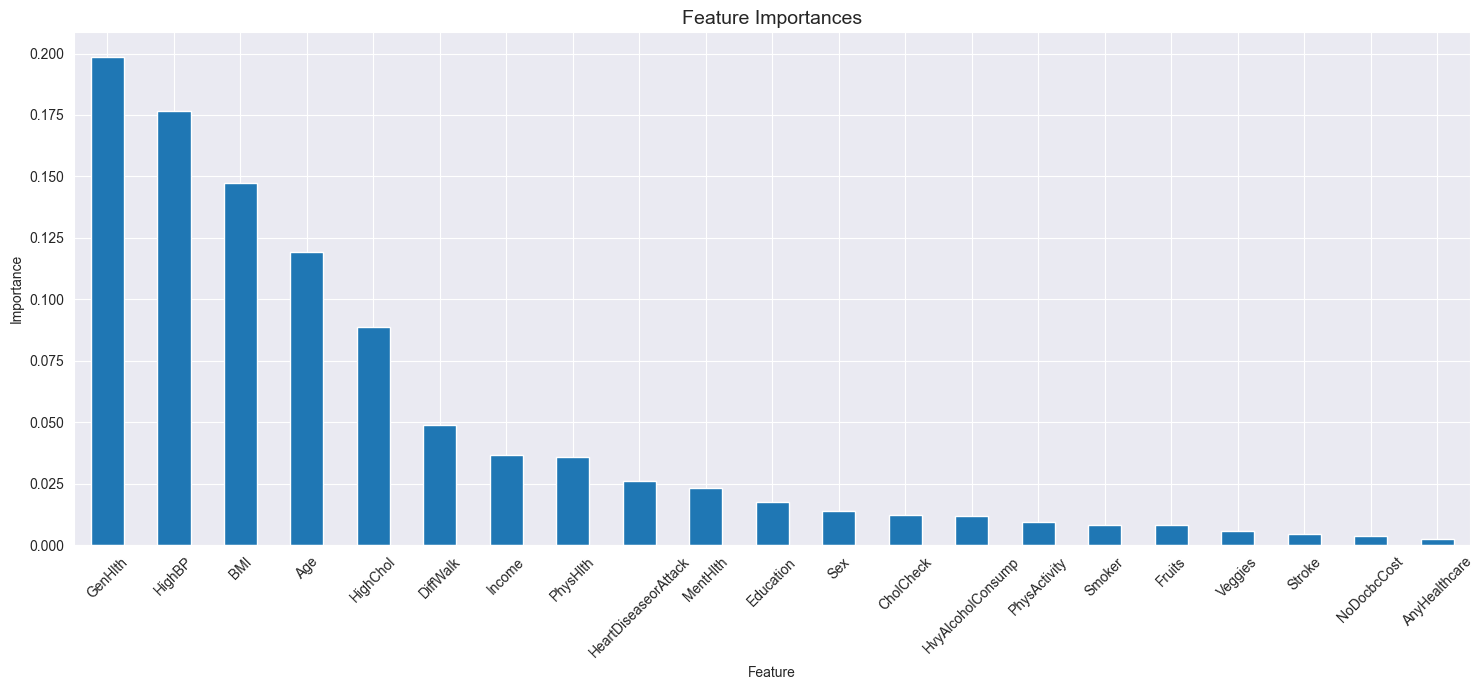

In [13]:
plt.figure(figsize=(15, 7))
feat_imp.plot.bar()
plt.title("Feature Importances", fontsize=14)
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("rf_intrinsisch_FI.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor="white")

plt.show()

In [15]:
# Permutation Importance
perm_res = permutation_importance(modell, X_train, np.ravel(y_train), n_repeats=30, random_state=42)

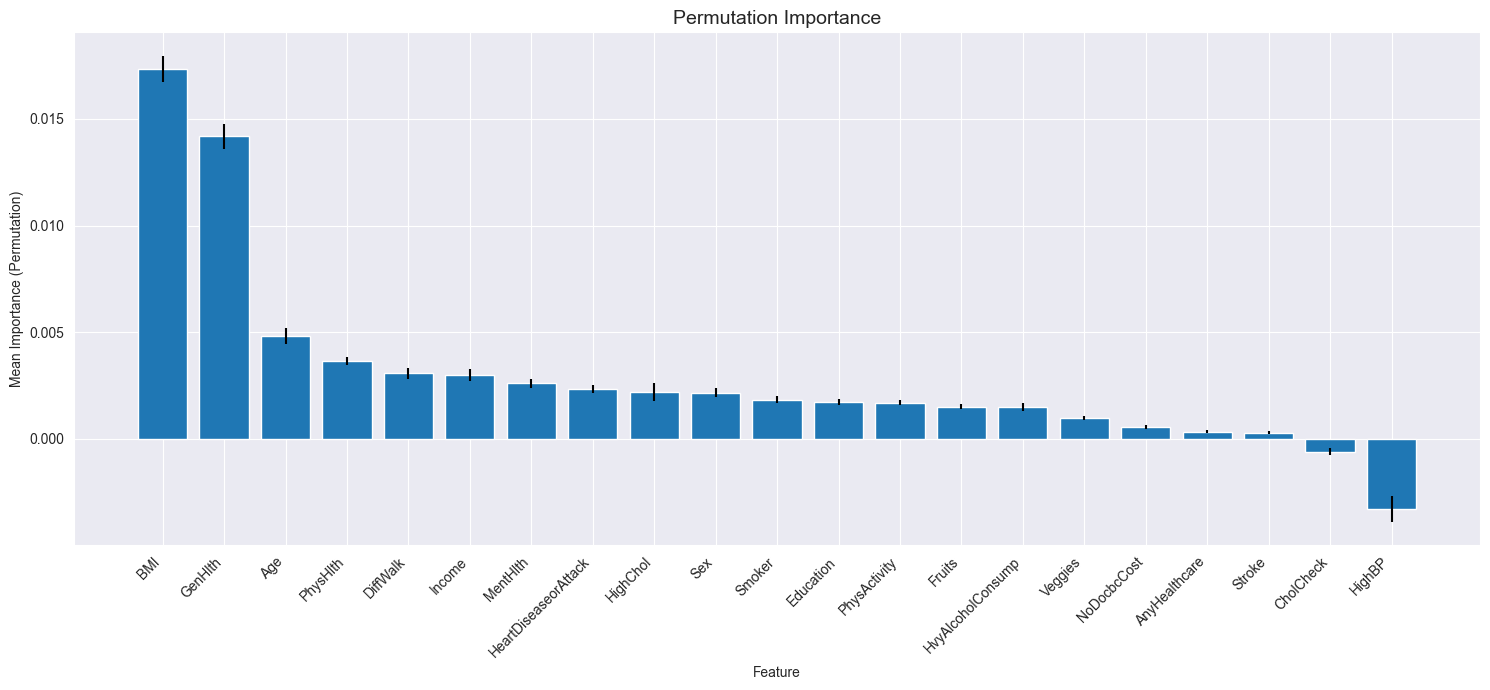

In [16]:
perm_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance_mean': perm_res.importances_mean,
    'importance_std': perm_res.importances_std,
}).sort_values(by='importance_mean', ascending=False)

plt.figure(figsize=(15, 7))
plt.bar(range(len(perm_df)), perm_df['importance_mean'], yerr=perm_df['importance_std'])
plt.xticks(range(len(perm_df)), perm_df['feature'], rotation=45, ha='right')
plt.ylabel('Mean Importance (Permutation)')
plt.xlabel('Feature')
plt.title('Permutation Importance', fontsize=14)
plt.tight_layout()

plt.savefig("rf_intrinsisch_PI.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor="white")

plt.show()

## E_T_RF_2: Analyse der Erklärbarkeit von Random Forest durch SHAP

### Global

In [14]:
'''# SHAP_Value
explainer = shap.TreeExplainer(modell, X_train, feature_perturbation = "interventional")
shap_values = explainer.shap_values(X_test)'''

100%|===================| 101471/101472 [310:36<00:00]        

In [15]:
'''#Backup Explainer
dump(shap_values, "shap_values.joblib")'''

['shap_values.joblib']

In [12]:
'''explainer = shap.TreeExplainer(modell, X_train, feature_perturbation = "interventional")
shap_values = joblib.load("shap_explainer.joblib")'''

In [16]:
print(type(shap_values), np.shape(shap_values))
#np.save("shap_values.npy", shap_values)
#print("Saved")

<class 'numpy.ndarray'> (50736, 21, 2)


In [18]:
explainer = shap.TreeExplainer(modell, X_train, feature_perturbation = "interventional")
sv_1p = explainer.shap_values(obs_1p)
sv_1n = explainer.shap_values(obs_1n)
sv_2p = explainer.shap_values(obs_2p)
sv_2n = explainer.shap_values(obs_2n)

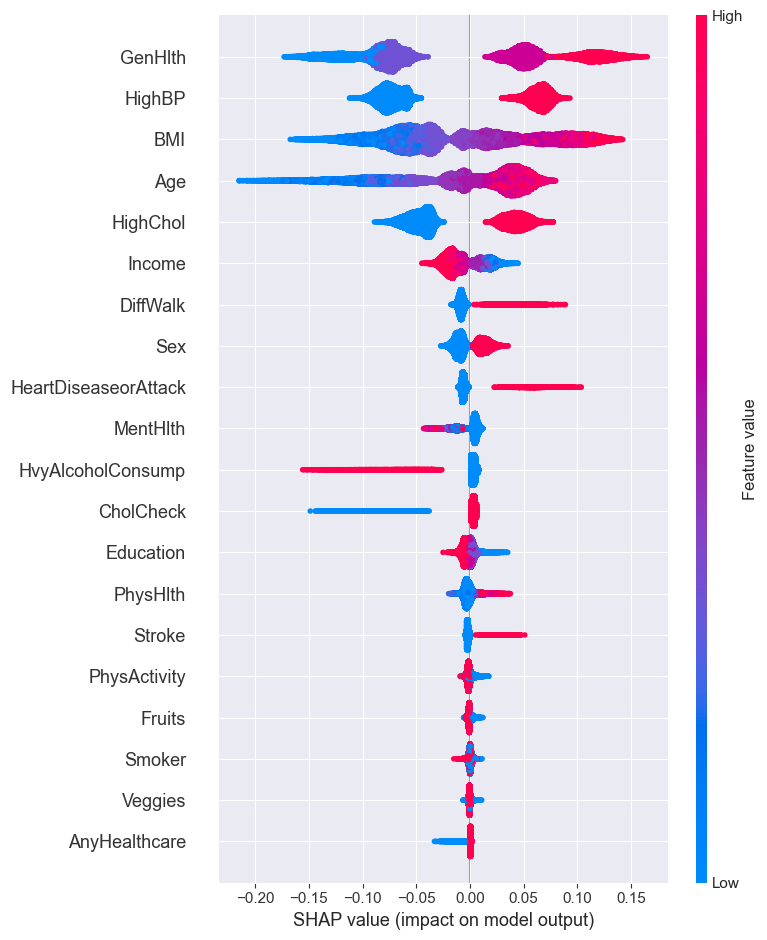

In [17]:
# Summary Plot für Klasse1
sv_1 = shap_values[:,:,1]
plt.figure(figsize=(15, 7))
shap.summary_plot(sv_1, X_test, feature_names=X_test.columns, plot_type="dot", show=False)
plt.tight_layout()

plt.savefig("rf_shap_summary_class_1.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )

plt.show()

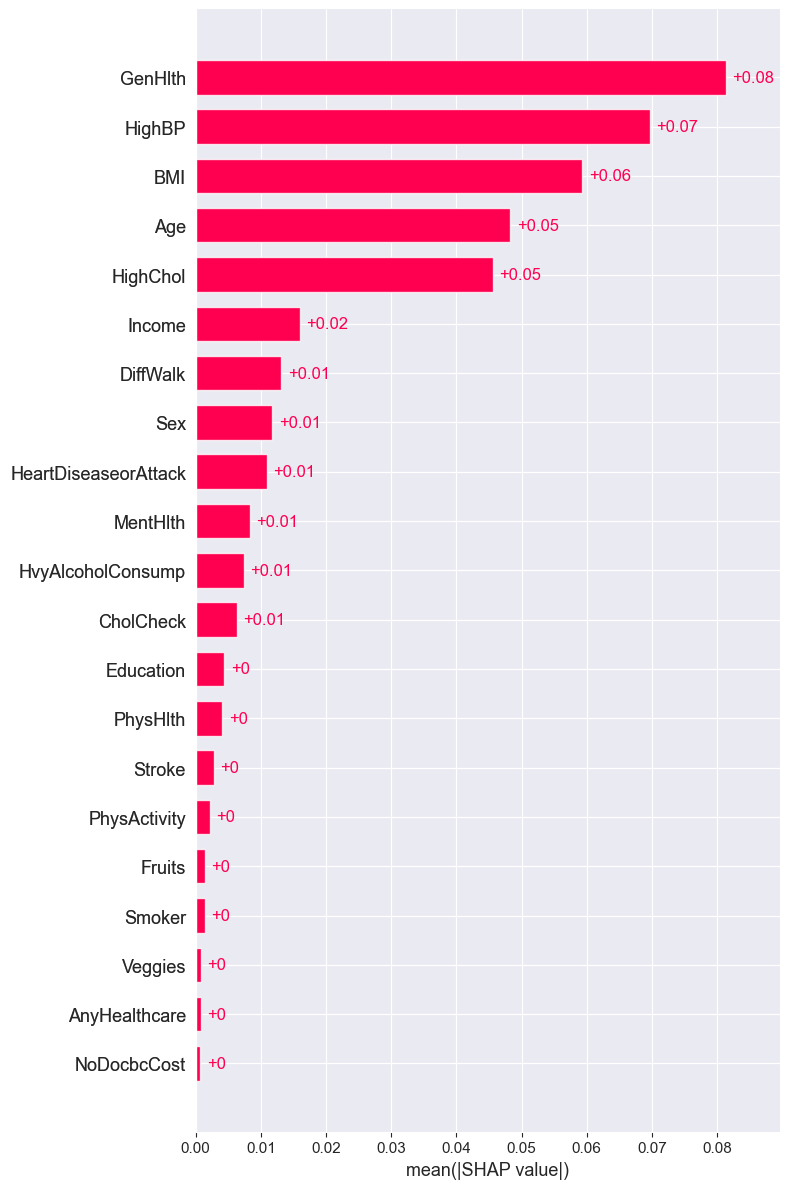

In [99]:
sv_class1 = shap_values[:, :, 1]
base_val = explainer.expected_value[1]
expl = Explanation(
    values        = sv_class1,
    base_values   = np.repeat(base_val, sv_class1.shape[0]),
    data          = X_test.values,
    feature_names = list(X_test.columns)
)

plt.figure(figsize=(12, 8))
shap.plots.bar(
    expl,
    max_display=21,
    show=False
)
plt.tight_layout()

plt.savefig("rf_shap_meanSHAP_bar.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )

plt.show()

<Figure size 640x480 with 0 Axes>

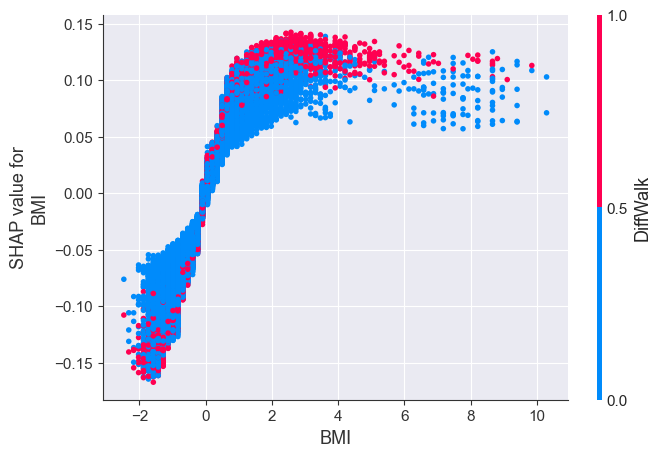

In [29]:
# Dependence Plot
plt.figure()
sv_2 = shap_values[:,:,1]
shap.dependence_plot("BMI", sv_2, X_test, interaction_index="DiffWalk", show=False)
plt.savefig("rf_shap_dpd_bmi_diff.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

<Figure size 640x480 with 0 Axes>

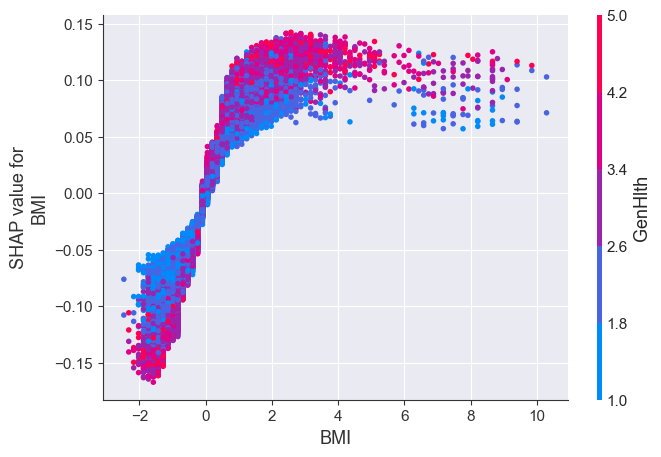

In [30]:
# Dependence Plot
plt.figure()
sv_2 = shap_values[:,:,1]
shap.dependence_plot("BMI", sv_2, X_test, interaction_index="GenHlth", show=False)
plt.savefig("rf_shap_dpd_bmi_genhlth.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

<Figure size 640x480 with 0 Axes>

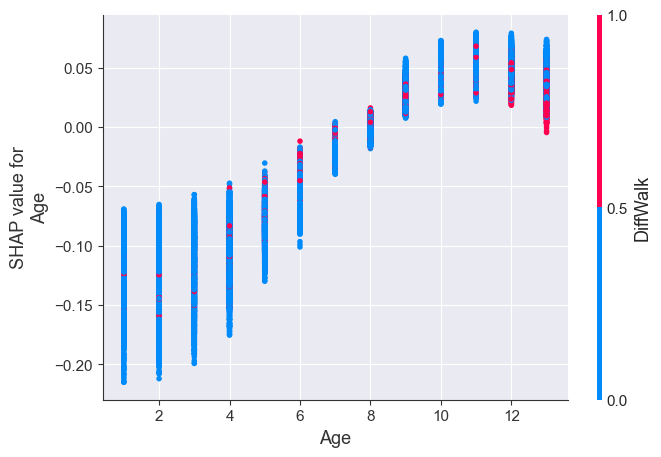

In [31]:
# Dependence Plot
plt.figure()
sv_2 = shap_values[:,:,1]
shap.dependence_plot("Age", sv_2, X_test, interaction_index="DiffWalk", show=False)
plt.savefig("rf_shap_dpd_age_diff.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

### Lokal
### Test Konsistenz

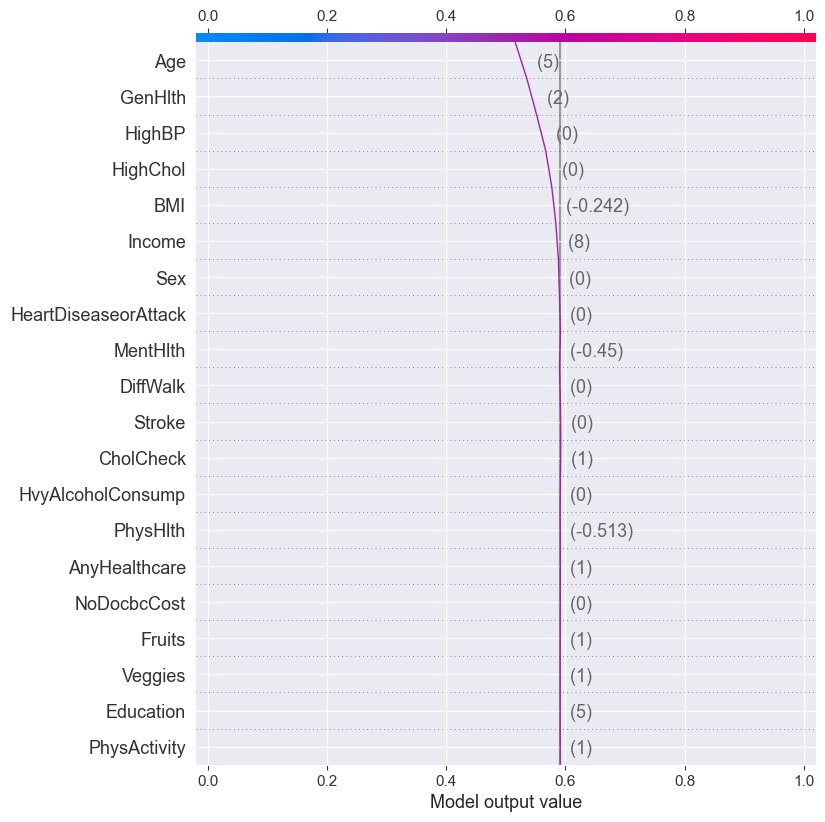

In [43]:
# Beobachtung 2 in Testset
i = 2
sv_i = sv_1[i]
base_value = explainer.expected_value[1]
feat_vals = X_test.iloc[i].values
feat_names = list(X_test.columns)


plt.figure(figsize=(15, 7))
shap.decision_plot(base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    link="logit",
    show=False)
plt.savefig("rf_shap_lokal_2.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

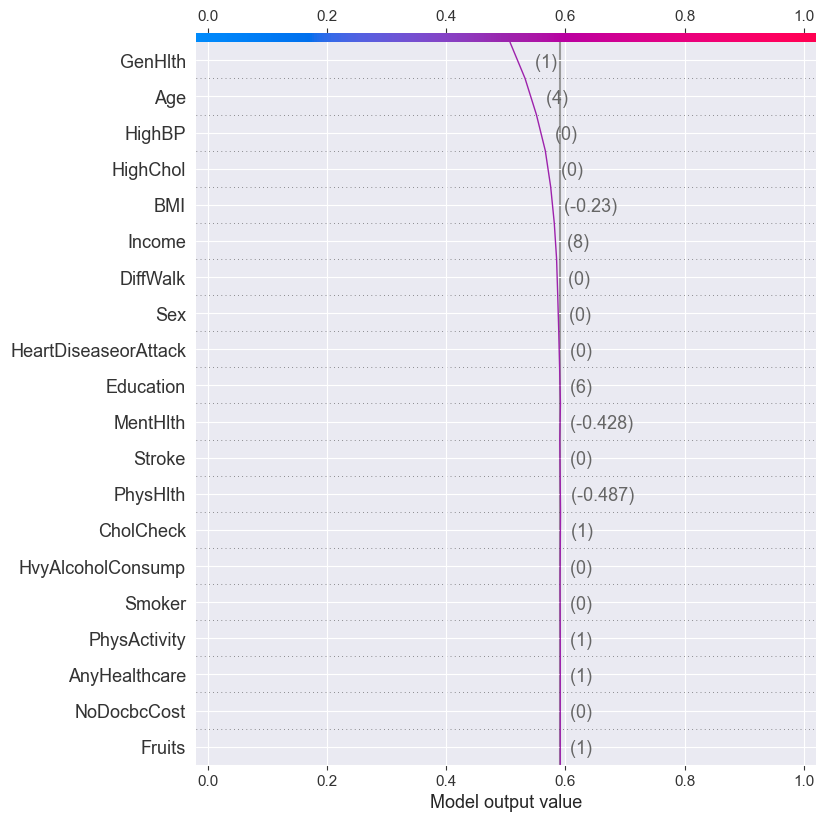

In [29]:
base_value = explainer.expected_value[1]
sv_i = sv_1p[:, 1]
feat_vals  = obs_1p.values
feat_names = obs_1p.index.tolist()

plt.figure(figsize=(15, 7))
shap.decision_plot(
    base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    link="logit",
    show=False
)

plt.savefig(
    "rf_shap_lokal_obs_1p_logit.png",
    dpi=300,
    format="png",
    bbox_inches="tight",
    facecolor='w'
)
plt.show()

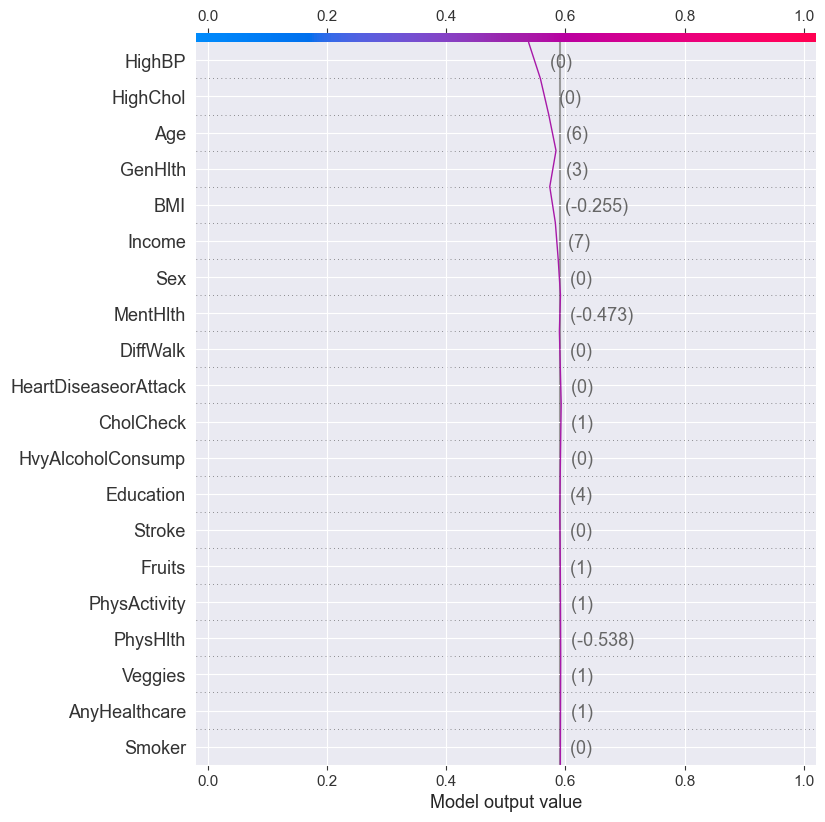

In [30]:
base_value = explainer.expected_value[1]
sv_i = sv_1n[:, 1]
feat_vals  = obs_1n.values
feat_names = obs_1n.index.tolist()

plt.figure(figsize=(15, 7))
shap.decision_plot(
    base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    link="logit",
    show=False
)

plt.savefig(
    "rf_shap_lokal_obs_1n_logit.png",
    dpi=300,
    format="png",
    bbox_inches="tight",
    facecolor='w'
)
plt.show()

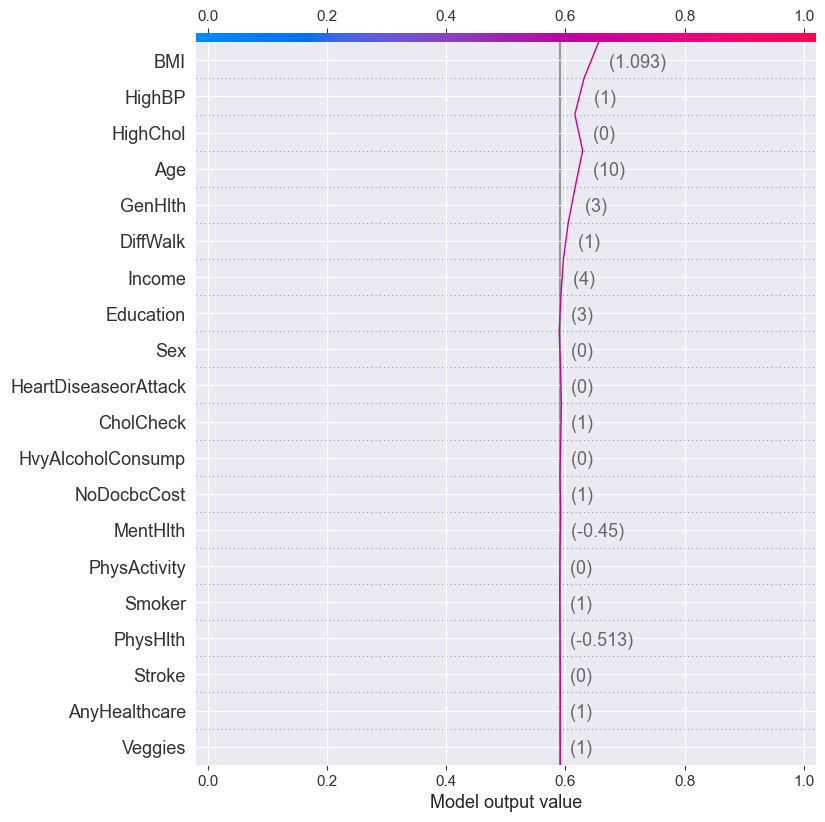

In [44]:
# Beobachtung 2 in Testset
i = 1
sv_i = sv_1[i]
base_value = explainer.expected_value[1]
feat_vals = X_test.iloc[i].values
feat_names = list(X_test.columns)


plt.figure(figsize=(15, 7))
shap.decision_plot(base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    link="logit",
    show=False)
plt.savefig("rf_shap_lokal_1.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

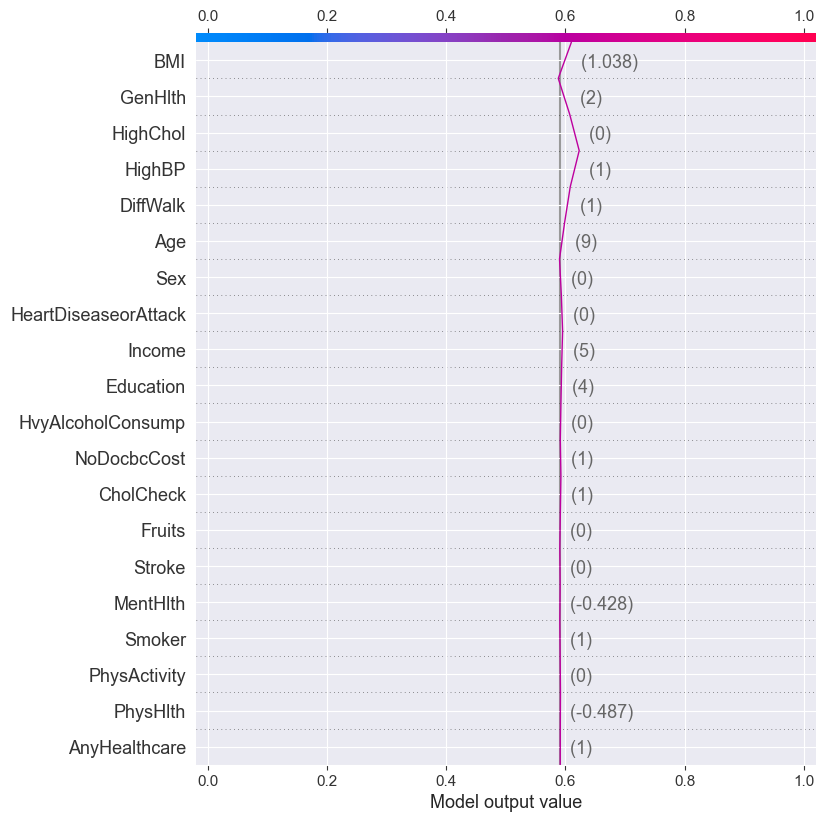

In [31]:
base_value = explainer.expected_value[1]
sv_i = sv_2p[:, 1]
feat_vals  = obs_2p.values
feat_names = obs_2p.index.tolist()

plt.figure(figsize=(15, 7))
shap.decision_plot(
    base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    link="logit",
    show=False
)

plt.savefig(
    "rf_shap_lokal_obs_2p_logit.png",
    dpi=300,
    format="png",
    bbox_inches="tight",
    facecolor='w'
)
plt.show()

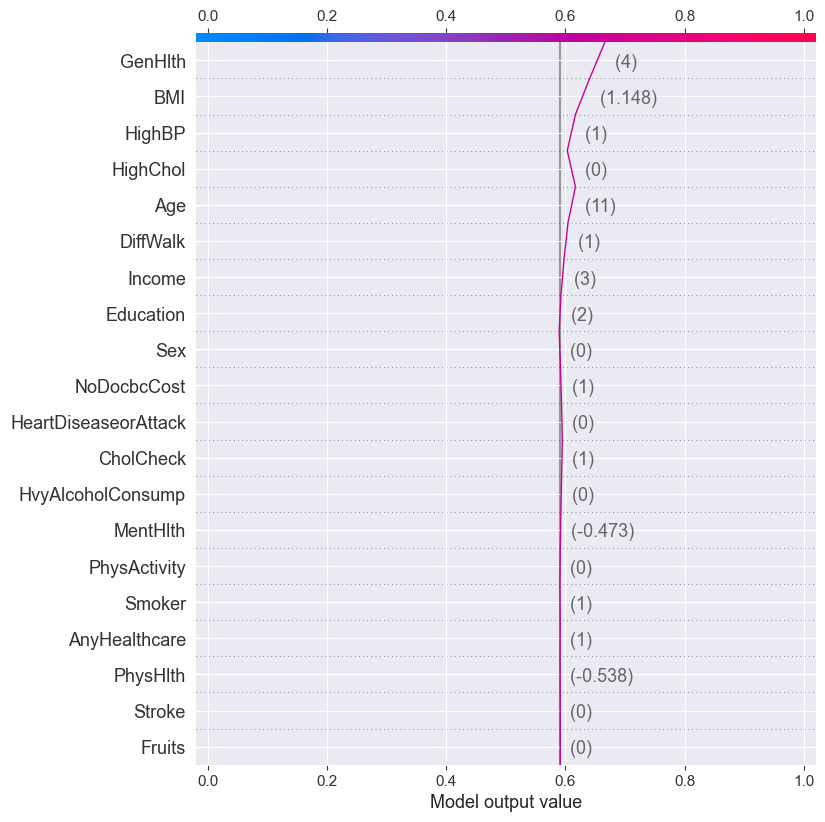

In [32]:
base_value = explainer.expected_value[1]
sv_i = sv_2n[:, 1]
feat_vals  = obs_2n.values
feat_names = obs_2n.index.tolist()

plt.figure(figsize=(15, 7))
shap.decision_plot(
    base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    link="logit",
    show=False
)

plt.savefig(
    "rf_shap_lokal_obs_2n_logit.png",
    dpi=300,
    format="png",
    bbox_inches="tight",
    facecolor='w'
)
plt.show()

### ohne logit

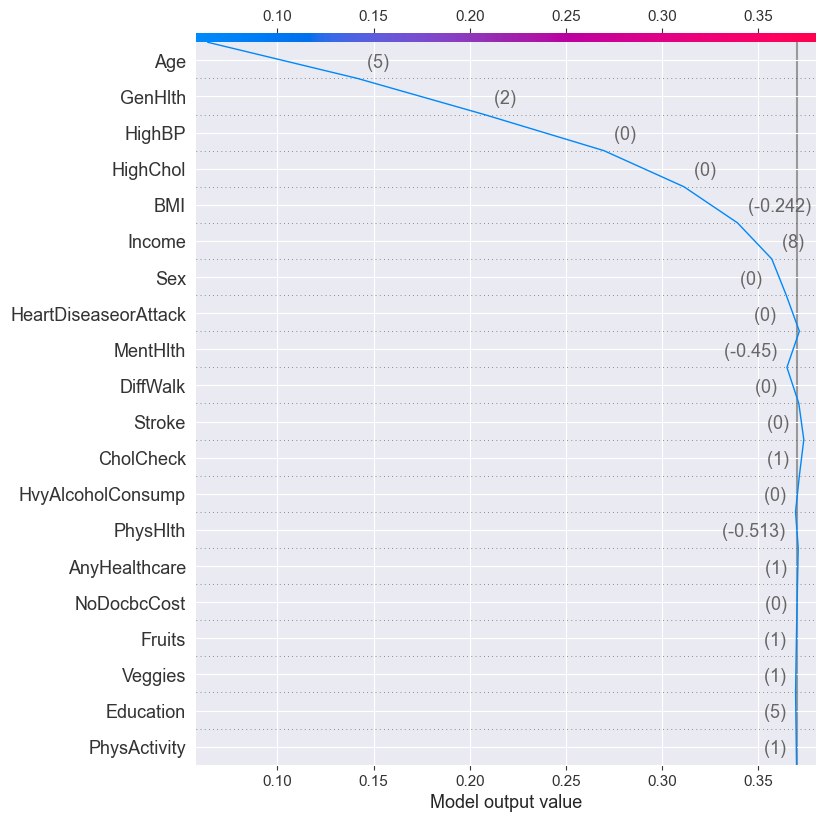

In [57]:
# Beobachtung 2 in Testset SHAP
i = 2
sv_i = sv_1[i]
base_value = explainer.expected_value[1]
feat_vals = X_test.iloc[i].values
feat_names = list(X_test.columns)


plt.figure(figsize=(15, 7))
shap.decision_plot(base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    show=False)
plt.savefig("rf_shap_lokal_2_sv.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

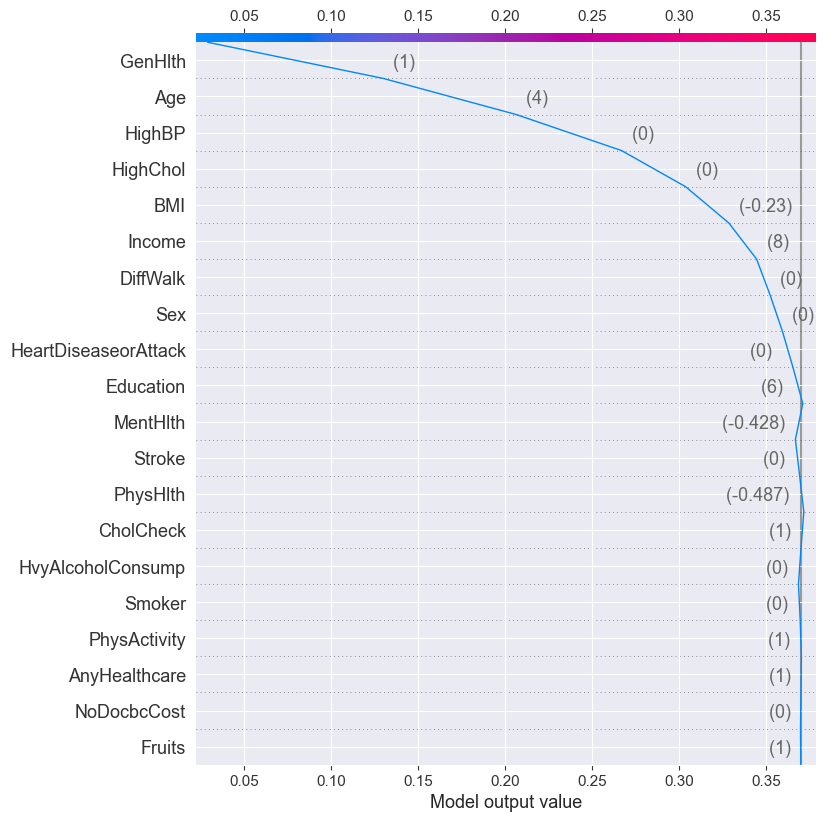

In [25]:
base_value = explainer.expected_value[1]
sv_i = sv_1p[:, 1]
feat_vals  = obs_1p.values
feat_names = obs_1p.index.tolist()

plt.figure(figsize=(15, 7))
shap.decision_plot(
    base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    show=False
)

plt.savefig(
    "rf_shap_lokal_obs_1p.png",
    dpi=300,
    format="png",
    bbox_inches="tight",
    facecolor='w'
)
plt.show()

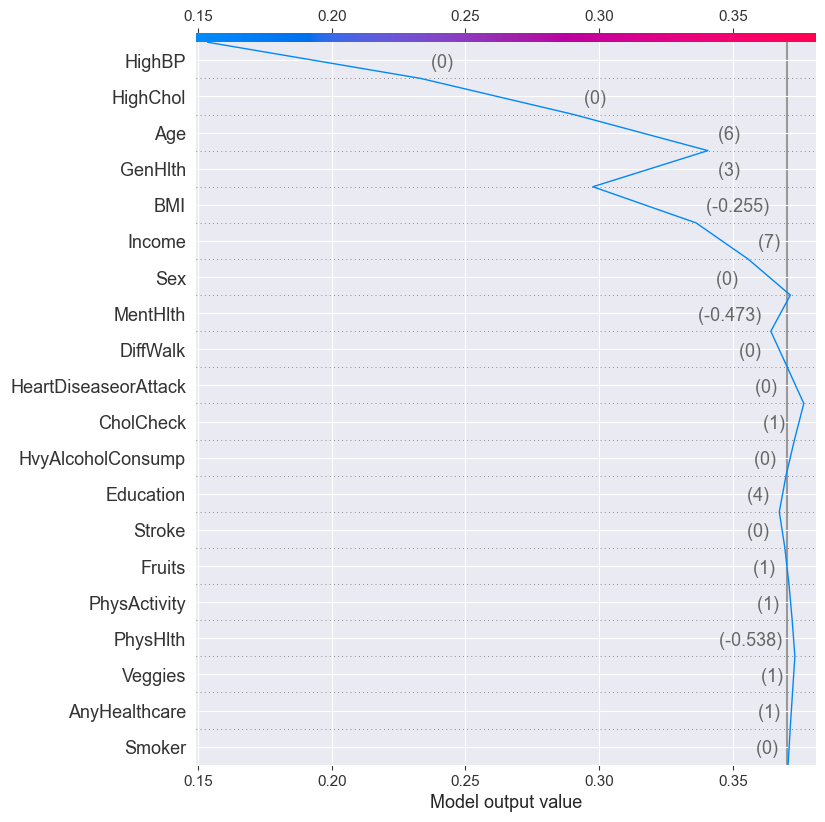

In [26]:
base_value = explainer.expected_value[1]
sv_i = sv_1n[:, 1]
feat_vals  = obs_1n.values
feat_names = obs_1n.index.tolist()

plt.figure(figsize=(15, 7))
shap.decision_plot(
    base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    show=False
)

plt.savefig(
    "rf_shap_lokal_obs_1n.png",
    dpi=300,
    format="png",
    bbox_inches="tight",
    facecolor='w'
)
plt.show()

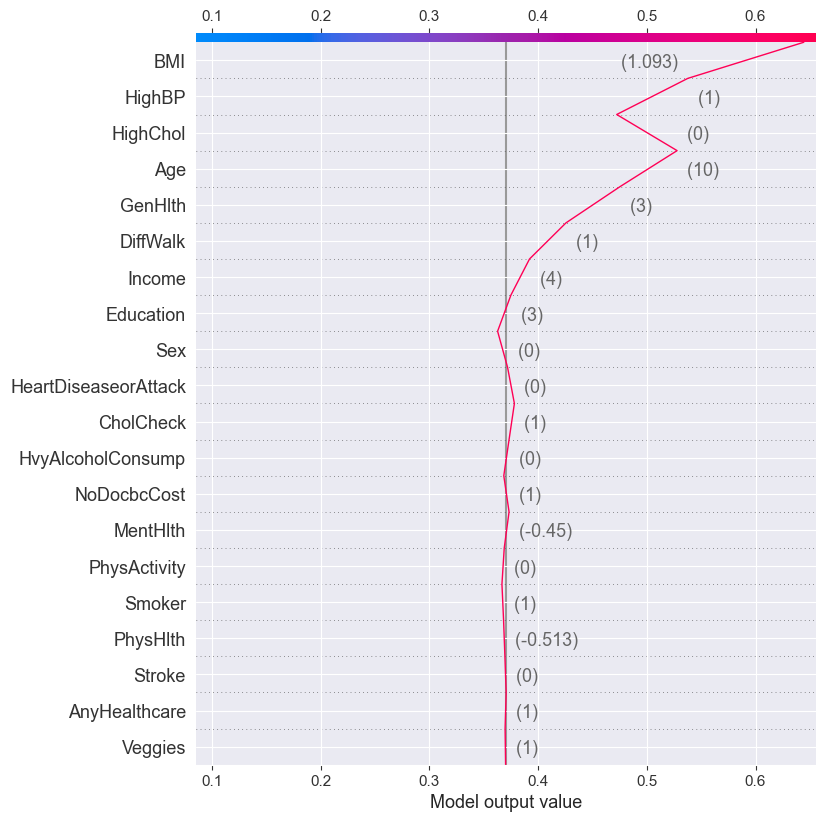

In [58]:
# Beobachtung 1 in Testset SHAP
i = 1
sv_i = sv_1[i]
base_value = explainer.expected_value[1]
feat_vals = X_test.iloc[i].values
feat_names = list(X_test.columns)


plt.figure(figsize=(15, 7))
shap.decision_plot(base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    show=False)
plt.savefig("rf_shap_lokal_1_sv.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

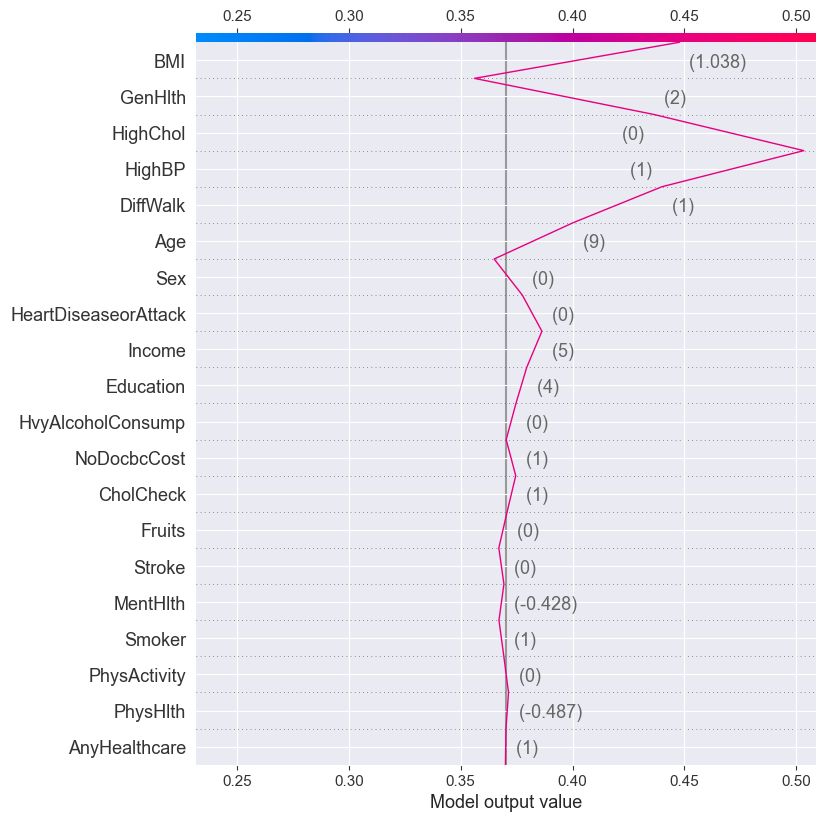

In [27]:
base_value = explainer.expected_value[1]
sv_i = sv_2p[:, 1]
feat_vals  = obs_2p.values
feat_names = obs_2p.index.tolist()

plt.figure(figsize=(15, 7))
shap.decision_plot(
    base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    show=False
)

plt.savefig(
    "rf_shap_lokal_obs_2p.png",
    dpi=300,
    format="png",
    bbox_inches="tight",
    facecolor='w'
)
plt.show()

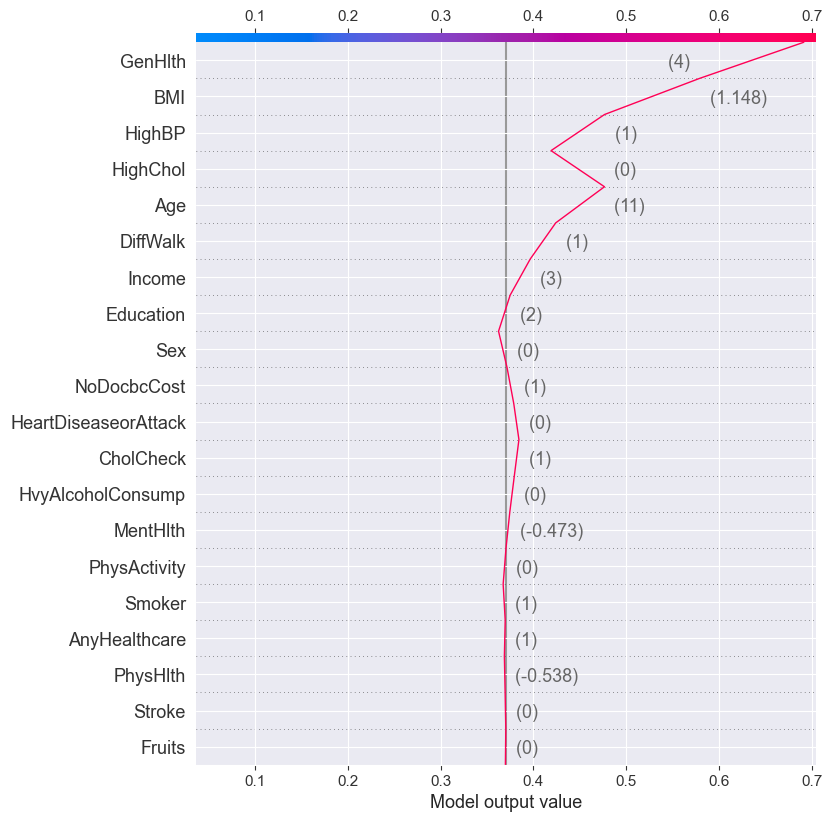

In [28]:
base_value = explainer.expected_value[1]
sv_i = sv_2n[:, 1]
feat_vals  = obs_2n.values
feat_names = obs_2n.index.tolist()

plt.figure(figsize=(15, 7))
shap.decision_plot(
    base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    show=False
)

plt.savefig(
    "rf_shap_lokal_obs_2n.png",
    dpi=300,
    format="png",
    bbox_inches="tight",
    facecolor='w'
)
plt.show()

<Figure size 640x480 with 0 Axes>

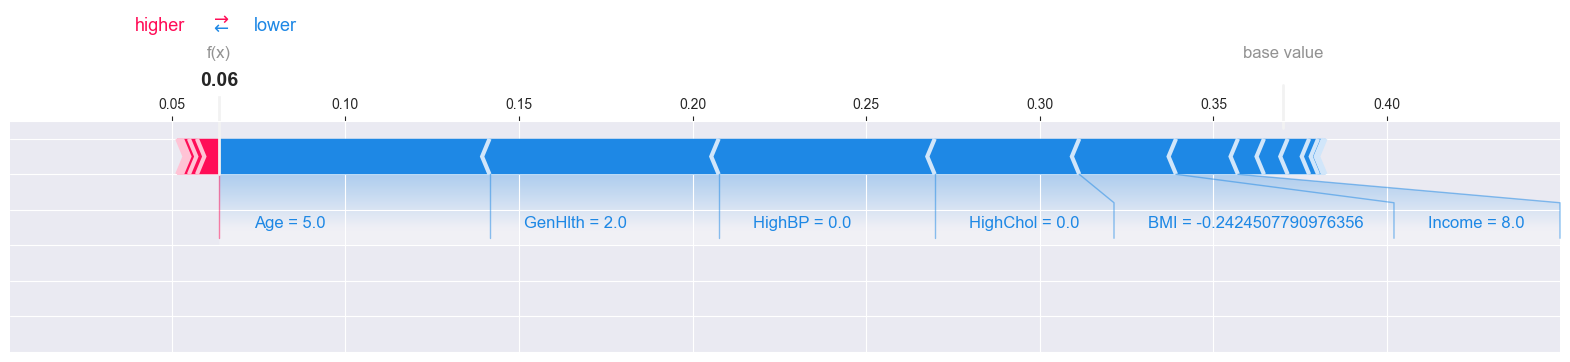

In [59]:
# Force Plot für Beobachtung 2
i = 2
sv_i = sv_1[i]
base_value = explainer.expected_value[1]
feat_vals = X_test.iloc[i].values
feat_names = list(X_test.columns)

plt.figure()
shap.force_plot(
    base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    matplotlib=True,
    show=False)

plt.savefig("rf_shap_force_lokal_2.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

<Figure size 640x480 with 0 Axes>

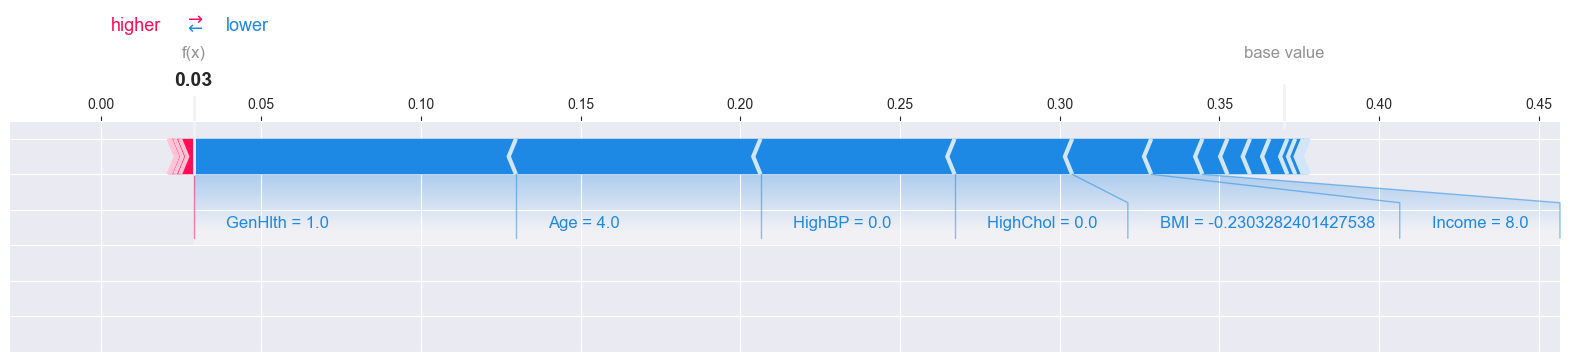

In [33]:
# Force Plot für Beobachtung 2
base_value = explainer.expected_value[1]
sv_i = sv_1p[:, 1]
feat_vals  = obs_1p.values
feat_names = obs_1p.index.tolist()

plt.figure()
shap.force_plot(
    base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    matplotlib=True,
    show=False)

plt.savefig("rf_shap_force_lokal_1p.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

<Figure size 640x480 with 0 Axes>

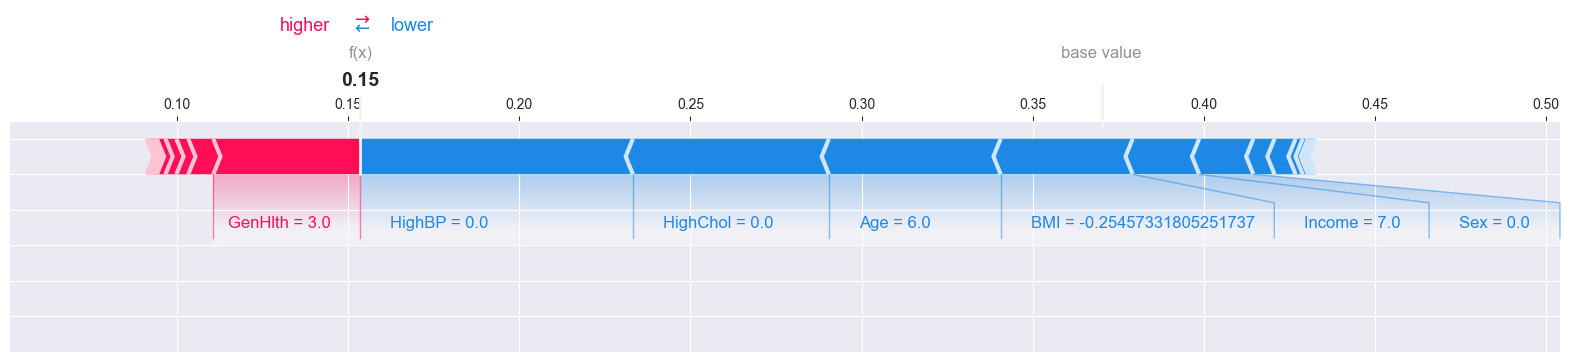

In [34]:
# Force Plot für Beobachtung 2
base_value = explainer.expected_value[1]
sv_i = sv_1n[:, 1]
feat_vals  = obs_1n.values
feat_names = obs_1n.index.tolist()

plt.figure()
shap.force_plot(
    base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    matplotlib=True,
    show=False)

plt.savefig("rf_shap_force_lokal_1n.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

<Figure size 640x480 with 0 Axes>

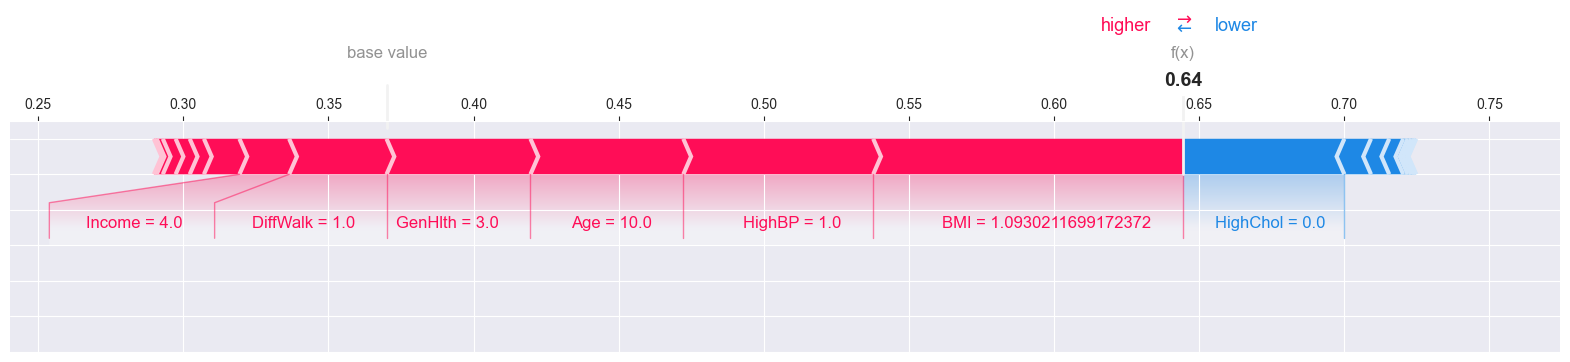

In [60]:
# Force Plot für Beobachtung 1
i = 1
sv_i = sv_1[i]
base_value = explainer.expected_value[1]
feat_vals = X_test.iloc[i].values
feat_names = list(X_test.columns)

plt.figure()
shap.force_plot(
    base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    matplotlib=True,
    show=False)

plt.savefig("rf_shap_force_lokal_1.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

<Figure size 640x480 with 0 Axes>

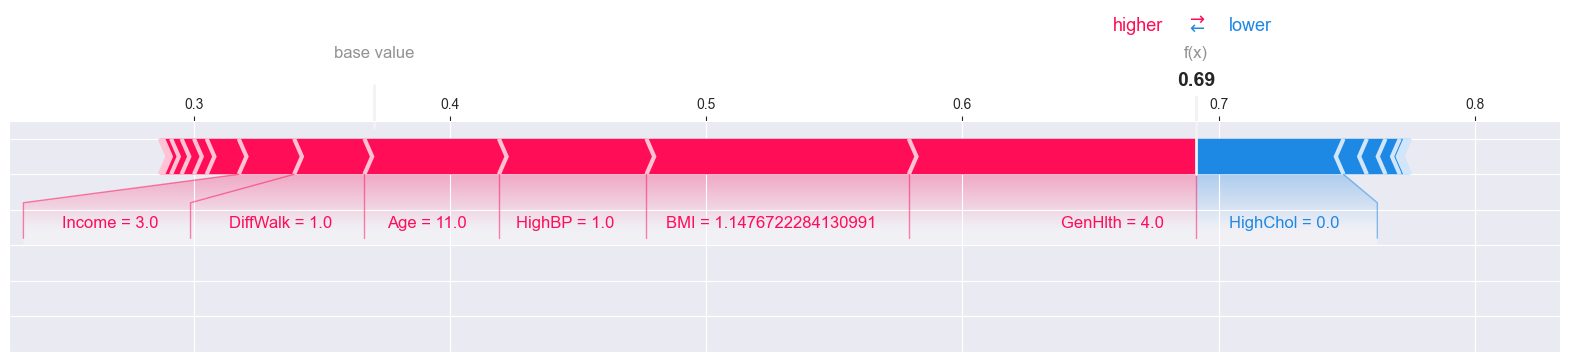

In [35]:
# Force Plot für Beobachtung 1
base_value = explainer.expected_value[1]
sv_i = sv_2n[:, 1]
feat_vals  = obs_2n.values
feat_names = obs_2n.index.tolist()

plt.figure()
shap.force_plot(
    base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    matplotlib=True,
    show=False)

plt.savefig("rf_shap_force_lokal_2n.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

<Figure size 640x480 with 0 Axes>

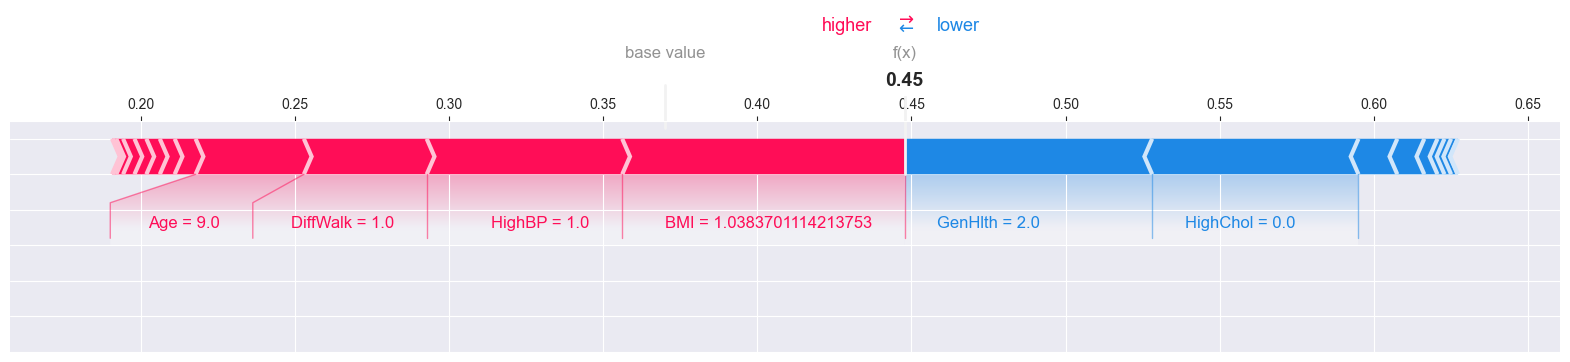

In [37]:
# Force Plot für Beobachtung 1
base_value = explainer.expected_value[1]
sv_i = sv_2p[:, 1]
feat_vals  = obs_2p.values
feat_names = obs_2p.index.tolist()

plt.figure()
shap.force_plot(
    base_value,
    sv_i,
    features=feat_vals,
    feature_names=feat_names,
    matplotlib=True,
    show=False)

plt.savefig("rf_shap_force_lokal_2p.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
            facecolor='w'
            )
plt.show()

In [71]:
sample_idx = np.random.choice(X_test.shape[0], size = 100, replace = False)
sv_sample = explainer(X_test.iloc[sample_idx])

100%|===================| 199/200 [00:37<00:00]        

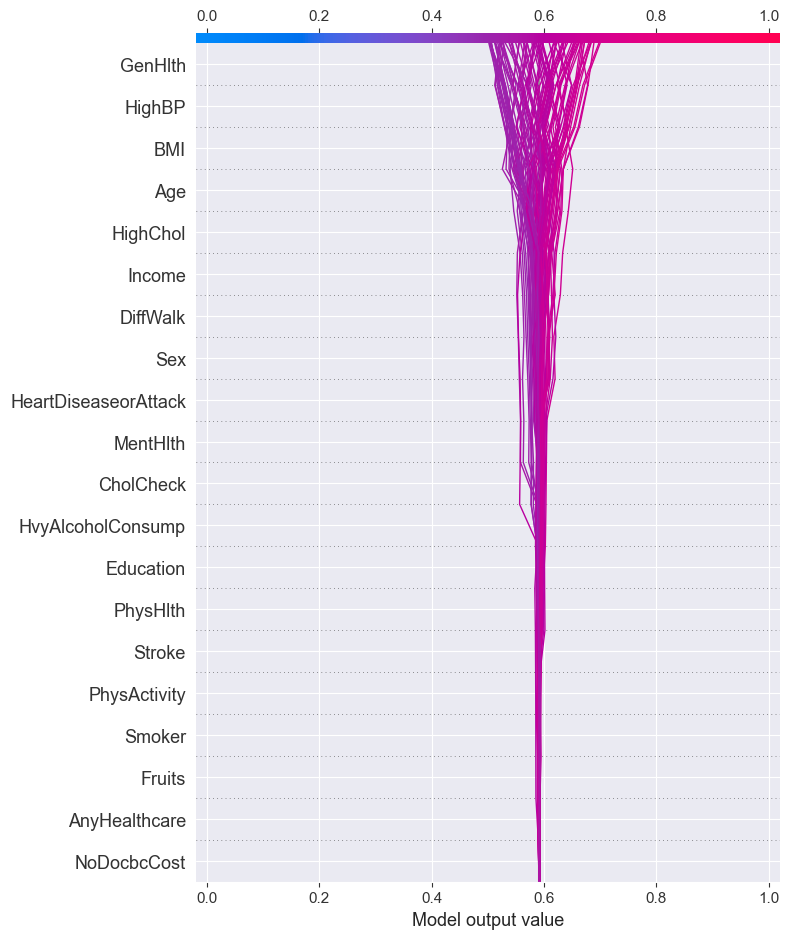

In [70]:
sv_3 = sv_1[sample_idx]

plt.figure(figsize=(15, 7))
shap.decision_plot(
    explainer.expected_value[1],
    sv_3,
    features=feat_vals,
    feature_names=feat_names,
    link="logit",
    show=False
)
plt.tight_layout()

plt.savefig(
    "rf_shap_global_decision_stichprobe.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="w"
)

plt.show()

## E_T_RF_3: Analyse der Erklärbarkeit von Random Forest durch LIME

In [38]:
explainer_lime = LimeTabularExplainer(
    training_data    = X_train.values,          # numpy-Array, nicht DataFrame
    feature_names    = X_train.columns.tolist(),# oder feature_names
    class_names      = ['Kein Diabetes', 'Diabetes'],  # deine Labels
    mode             = 'classification',
    discretize_continuous = True,
    random_state = 42
)

predict_proba = modell.predict_proba

In [87]:
# Erkläre die Beobachtung 2 vom test
idx = 2
exp = explainer_lime.explain_instance(
    data_row        = X_test.iloc[idx].values,
    predict_fn      = predict_proba,
    num_features    = 10,
    top_labels      = 1
)

explanation_list = exp.as_list(label=exp.top_labels[0])
print("Feature-Beitrag zur Klassenzuordnung:")
for feature, weight in explanation_list:
    print(f"{feature:30s}  →  {weight:+.3f}")

Feature-Beitrag zur Klassenzuordnung:
GenHlth <= 2.00                 →  +0.158
HighBP <= 0.00                  →  +0.141
Age <= 6.00                     →  +0.117
HighChol <= 0.00                →  +0.104
HeartDiseaseorAttack <= 0.00    →  +0.085
DiffWalk <= 0.00                →  +0.056
-0.69 < BMI <= -0.24            →  +0.054
HvyAlcoholConsump <= 0.00       →  -0.052
6.00 < Income <= 8.00           →  +0.034
Stroke <= 0.00                  →  +0.023


C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
# Erkläre die Beobachtung 2 vom test
data_row     = obs_1p.values
feature_names = obs_1p.index.tolist()

exp = explainer_lime.explain_instance(
    data_row        = data_row,
    predict_fn      = predict_proba,
    num_features    = 10,
    top_labels      = 1
)

explanation_list = exp.as_list(label=exp.top_labels[0])

print("Feature-Beitrag zur Klassenzuordnung:")
for feature, weight in explanation_list:
    print(f"{feature:30s}  →  {weight:+.3f}")

Feature-Beitrag zur Klassenzuordnung:
GenHlth <= 2.00                 →  +0.163
HighBP <= 0.00                  →  +0.141
Age <= 6.00                     →  +0.120
HighChol <= 0.00                →  +0.101
HeartDiseaseorAttack <= 0.00    →  +0.084
DiffWalk <= 0.00                →  +0.058
HvyAlcoholConsump <= 0.00       →  -0.056
-0.24 < BMI <= 0.50             →  -0.035
6.00 < Income <= 8.00           →  +0.032
Stroke <= 0.00                  →  +0.031


C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
# Erkläre die Beobachtung 2 vom test
data_row     = obs_1n.values
feature_names = obs_1n.index.tolist()

exp = explainer_lime.explain_instance(
    data_row        = data_row,
    predict_fn      = predict_proba,
    num_features    = 10,
    top_labels      = 1
)

explanation_list = exp.as_list(label=exp.top_labels[0])

print("Feature-Beitrag zur Klassenzuordnung:")
for feature, weight in explanation_list:
    print(f"{feature:30s}  →  {weight:+.3f}")

Feature-Beitrag zur Klassenzuordnung:
HighBP <= 0.00                  →  +0.141
Age <= 6.00                     →  +0.114
HighChol <= 0.00                →  +0.105
HeartDiseaseorAttack <= 0.00    →  +0.084
2.00 < GenHlth <= 3.00          →  -0.077
DiffWalk <= 0.00                →  +0.056
-0.69 < BMI <= -0.24            →  +0.053
HvyAlcoholConsump <= 0.00       →  -0.051
6.00 < Income <= 8.00           →  +0.036
Stroke <= 0.00                  →  +0.027


C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


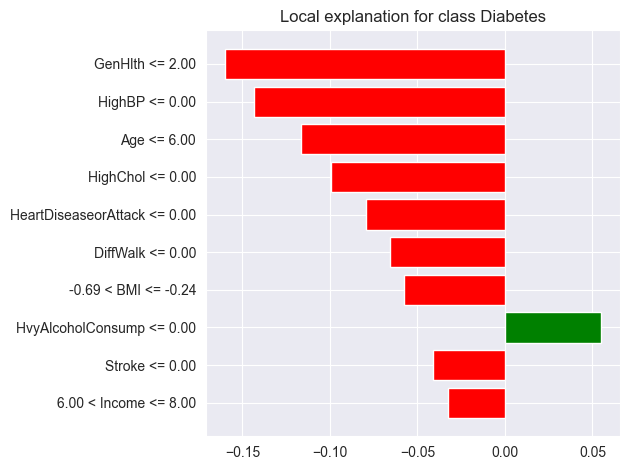

In [90]:
idx = 2
exp = explainer_lime.explain_instance(
    data_row    = X_test.iloc[idx].values,
    predict_fn  = modell.predict_proba,
    num_features= 10,
    num_samples = 5000,
    labels      = (1,)
)

fig1 = exp.as_pyplot_figure(label=1)
plt.tight_layout()

fig1.savefig(
    "rf_lime_exp_diabetes_2.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)

plt.show()

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


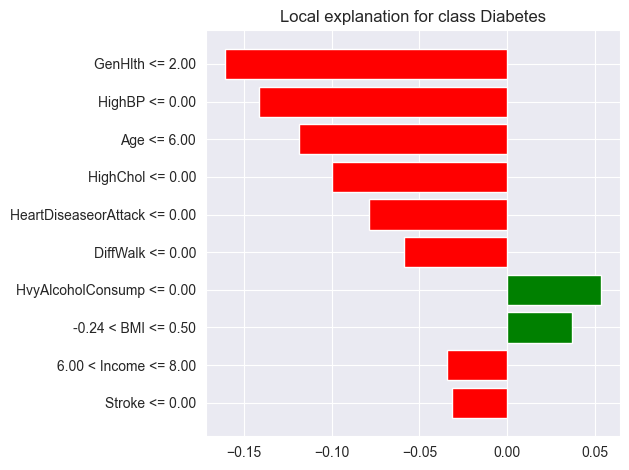

In [43]:
data_row     = obs_1p.values
feature_names = obs_1p.index.tolist()

exp = explainer_lime.explain_instance(
    data_row    = data_row,
    predict_fn  = modell.predict_proba,
    num_features= 10,
    num_samples = 5000,
    labels      = (1,)
)

fig1 = exp.as_pyplot_figure(label=1)
plt.tight_layout()

fig1.savefig(
    "rf_lime_exp_diabetes_1p.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)

plt.show()

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


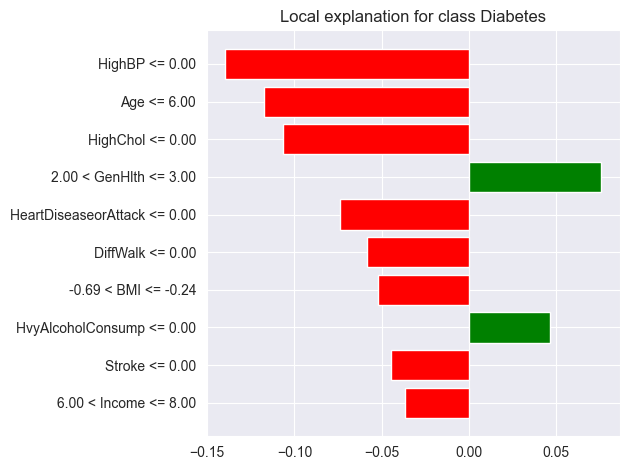

In [44]:
data_row     = obs_1n.values
feature_names = obs_1n.index.tolist()

exp = explainer_lime.explain_instance(
    data_row    = data_row,
    predict_fn  = modell.predict_proba,
    num_features= 10,
    num_samples = 5000,
    labels      = (1,)
)

fig1 = exp.as_pyplot_figure(label=1)
plt.tight_layout()

fig1.savefig(
    "rf_lime_exp_diabetes_1n.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)

plt.show()

In [69]:
# Erkläre die Beobachtung 2 vom test
idx = 1
exp = explainer_lime.explain_instance(
    data_row        = X_test.iloc[idx].values,
    predict_fn      = predict_proba,
    num_features    = 10,
    top_labels      = 1
)

explanation_list = exp.as_list(label=exp.top_labels[0])
print("Feature-Beitrag zur Klassenzuordnung:")
for feature, weight in explanation_list:
    print(f"{feature:30s}  →  {weight:+.3f}")

Feature-Beitrag zur Klassenzuordnung:
BMI > 0.50                      →  +0.149
0.00 < HighBP <= 1.00           →  +0.143
HighChol <= 0.00                →  -0.104
HeartDiseaseorAttack <= 0.00    →  -0.086
2.00 < GenHlth <= 3.00          →  +0.080
HvyAlcoholConsump <= 0.00       →  +0.060
DiffWalk > 0.00                 →  +0.059
8.00 < Age <= 10.00             →  +0.057
Income <= 5.00                  →  +0.039
Stroke <= 0.00                  →  -0.031


C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
# Erkläre die Beobachtung 1 vom test
data_row     = obs_2p.values
feature_names = obs_2p.index.tolist()

exp = explainer_lime.explain_instance(
    data_row        = data_row,
    predict_fn      = predict_proba,
    num_features    = 10,
    top_labels      = 1
)

explanation_list = exp.as_list(label=exp.top_labels[0])

print("Feature-Beitrag zur Klassenzuordnung:")
for feature, weight in explanation_list:
    print(f"{feature:30s}  →  {weight:+.3f}")

Feature-Beitrag zur Klassenzuordnung:
GenHlth <= 2.00                 →  +0.158
BMI > 0.50                      →  -0.140
0.00 < HighBP <= 1.00           →  -0.140
HighChol <= 0.00                →  +0.100
HeartDiseaseorAttack <= 0.00    →  +0.078
DiffWalk > 0.00                 →  -0.064
HvyAlcoholConsump <= 0.00       →  -0.061
8.00 < Age <= 10.00             →  -0.058
Income <= 5.00                  →  -0.037
Stroke <= 0.00                  →  +0.030


C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
# Erkläre die Beobachtung 2 vom test
data_row     = obs_2n.values
feature_names = obs_2n.index.tolist()

exp = explainer_lime.explain_instance(
    data_row        = data_row,
    predict_fn      = predict_proba,
    num_features    = 10,
    top_labels      = 1
)

explanation_list = exp.as_list(label=exp.top_labels[0])

print("Feature-Beitrag zur Klassenzuordnung:")
for feature, weight in explanation_list:
    print(f"{feature:30s}  →  {weight:+.3f}")

Feature-Beitrag zur Klassenzuordnung:
GenHlth > 3.00                  →  +0.162
BMI > 0.50                      →  +0.151
0.00 < HighBP <= 1.00           →  +0.141
HighChol <= 0.00                →  -0.106
HeartDiseaseorAttack <= 0.00    →  -0.083
Age > 10.00                     →  +0.071
HvyAlcoholConsump <= 0.00       →  +0.057
DiffWalk > 0.00                 →  +0.057
Income <= 5.00                  →  +0.038
Stroke <= 0.00                  →  -0.025


C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


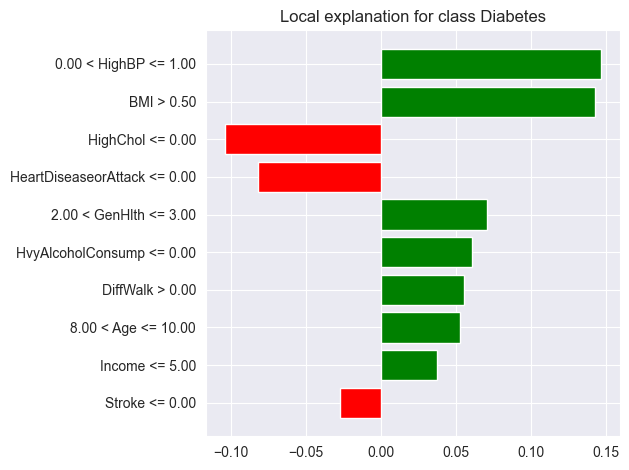

In [91]:
idx = 1
exp = explainer_lime.explain_instance(
    data_row    = X_test.iloc[idx].values,
    predict_fn  = modell.predict_proba,
    num_features= 10,
    num_samples = 5000,
    labels      = (1,)
)

fig2 = exp.as_pyplot_figure(label=1)

fig2.savefig(
    "rf_lime_exp_diabetes_1.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)
plt.tight_layout()
plt.show()

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


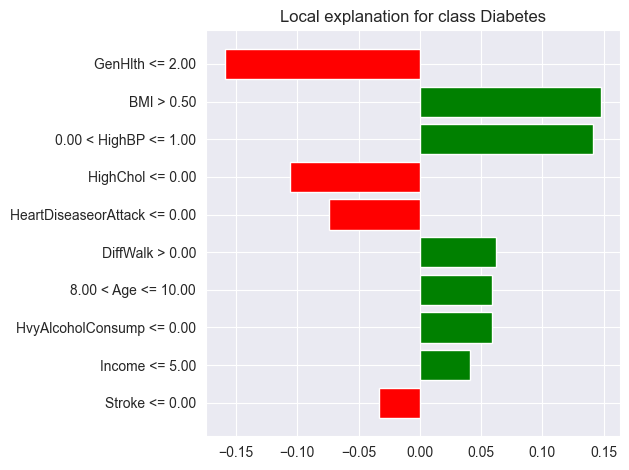

In [47]:
data_row     = obs_2p.values
feature_names = obs_2p.index.tolist()

exp = explainer_lime.explain_instance(
    data_row    = data_row,
    predict_fn  = modell.predict_proba,
    num_features= 10,
    num_samples = 5000,
    labels      = (1,)
)

fig1 = exp.as_pyplot_figure(label=1)
plt.tight_layout()

fig1.savefig(
    "rf_lime_exp_diabetes_2p.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)

plt.show()

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


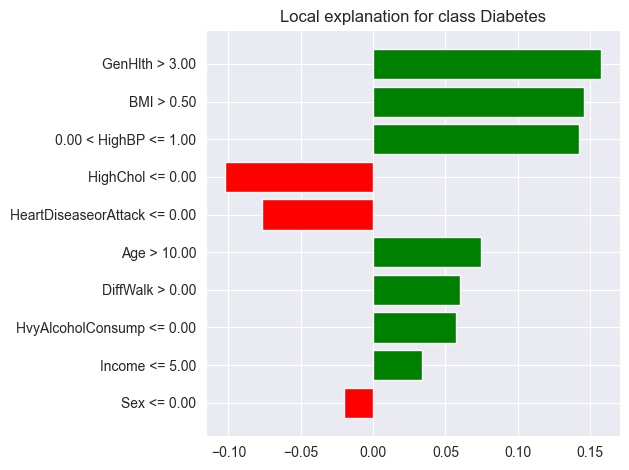

In [48]:
data_row     = obs_2n.values
feature_names = obs_2n.index.tolist()

exp = explainer_lime.explain_instance(
    data_row    = data_row,
    predict_fn  = modell.predict_proba,
    num_features= 10,
    num_samples = 5000,
    labels      = (1,)
)

fig1 = exp.as_pyplot_figure(label=1)
plt.tight_layout()

fig1.savefig(
    "rf_lime_exp_diabetes_2n.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)

plt.show()